# Hello!

This time, I'm gonna analyze student performance. The datasets in this notebook is gained in [Kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams).

There are many question I want to answer using this datasets. You will find many question I need to answer in this following notebook.

## Preparing the data

Before we begin, we need to clean the data to make it easier to analyze.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
performance = pd.read_csv('StudentsPerformance.csv')

In [3]:
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
performance.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
performance.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing values in this dataset.

In [6]:
performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Describing the numerical value in this datasets.

In [7]:
performance.shape

(1000, 8)

Let see all unique value in the categorical columns.

In [8]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
performance.gender.unique()

array(['female', 'male'], dtype=object)

In [10]:
performance['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [11]:
performance['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [13]:
performance.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [16]:
performance['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [20]:
# drop race/ethnicity because it ambiguous
performance.drop('race/ethnicity', axis='columns', inplace=True)

In [21]:
performance.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Analyzing the data

### Question 1: is parent's education influence student's score?

First, we need to make a new column called 'overall_score' that calculated the mean of student's math, reading, and writing score.

In [24]:
# create a variable that calculated students score for each row
sum_three_score = performance[['math score','reading score','writing score']].sum(axis='columns')

In [27]:
# create new column that divided sum_three_score with 3
performance['overall_score'] = sum_three_score / 3

In [28]:
performance.overall_score.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: overall_score, dtype: float64

In [30]:
# see overall score group by parent's education
performance.groupby(['parental level of education']).overall_score.mean()

parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: overall_score, dtype: float64

In [31]:
# save it to a variable 
parent_ed = performance.groupby(['parental level of education']).overall_score.mean()

In [36]:
# sort it 
parent_ed.sort_values(ascending=False, inplace=True)
parent_ed

parental level of education
master's degree       73.598870
bachelor's degree     71.923729
associate's degree    69.569069
some college          68.476401
some high school      65.108007
high school           63.096939
Name: overall_score, dtype: float64

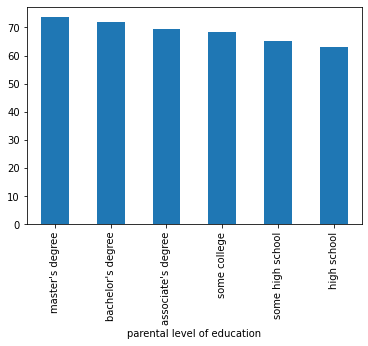

In [39]:
# plot it
parent_ed.plot(kind='bar')
plt.show()

Master's degree have an overall score highest than any other level of education. The difference between the highest and lowest is fairly significant (+- 10.5). It also interesting to see that parent's level on some high school is higher than high school.

### Question 2: Is test preparation course influence overall score? 

<AxesSubplot:xlabel='test preparation course'>

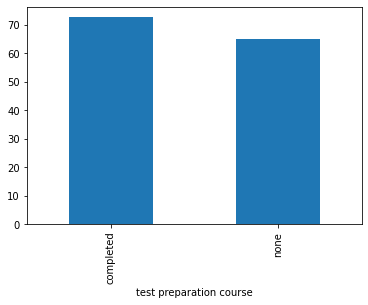

In [43]:
test_prep = performance.groupby(['test preparation course']).overall_score.mean()
test_prep.plot(kind='bar')

As you can see above, completing test preparation can make your overall score higher. 

### Question 3: Is there any difference in preparation course influenced for math, writing, or reading course?

Let see how is test preparation course differ in each course

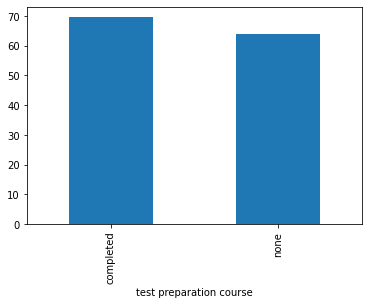

In [54]:
# math score 
math = performance.groupby(['test preparation course'])['math score'].mean()
math.plot(kind='bar')
plt.show()

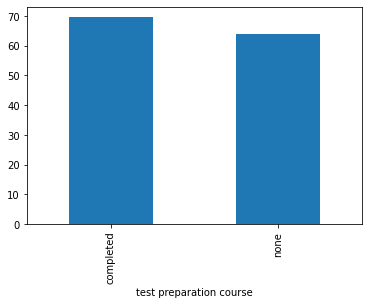

In [55]:
# reading score 
reading = performance.groupby(['test preparation course'])['reading score'].mean()
math.plot(kind='bar')
plt.show()

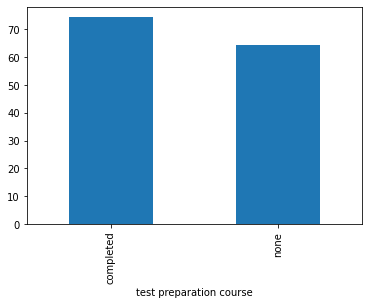

In [56]:
# writing score
writing = performance.groupby(['test preparation course'])['writing score'].mean()
writing.plot(kind='bar')
plt.show()

As you can see, completing test preparation make a higher score in all of the courses

### Question 4: Is lunch have an influence for overall score, as well as each score?

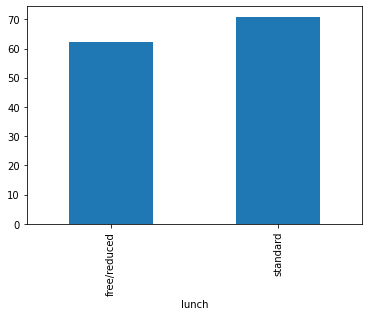

In [58]:
lunch_overall = performance.groupby('lunch').overall_score.mean()
lunch_overall.plot(kind='bar')
plt.show()

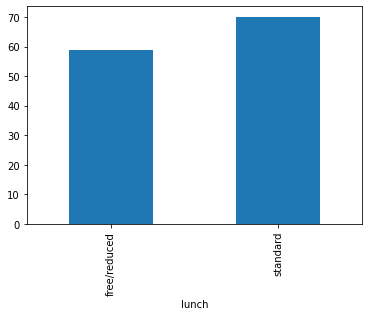

In [59]:
# math score 
lunch_math = performance.groupby('lunch')['math score'].mean()
lunch_math.plot(kind='bar')
plt.show()

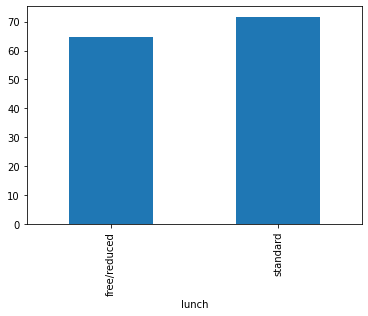

In [60]:
# reading score 
lunch_read = performance.groupby('lunch')['reading score'].mean()
lunch_read.plot(kind='bar')
plt.show()

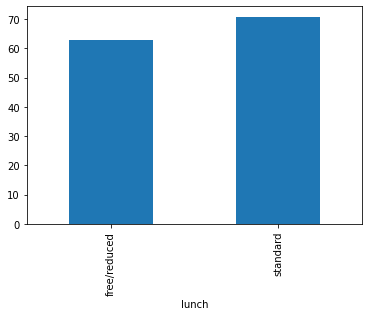

In [61]:
# writing score 
lunch_write = performance.groupby('lunch')['writing score'].mean()
lunch_write.plot(kind='bar')
plt.show()

As you can see above, standard lunch is higher than free/reduced lunch for student's score in all areas

### Question 5: What is the highest course's score in each gender?

In [67]:
# slice to get the dframe with female gender
female = performance[performance['gender'] == 'female']

In [68]:
female.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_score
0,female,bachelor's degree,standard,none,72,72,74,72.666667
1,female,some college,standard,completed,69,90,88,82.333333
2,female,master's degree,standard,none,90,95,93,92.666667
5,female,associate's degree,standard,none,71,83,78,77.333333
6,female,some college,standard,completed,88,95,92,91.666667


In [72]:
female_stat = female.describe()

In [74]:
female_score = female_stat.loc['mean', 'math score':'writing score']

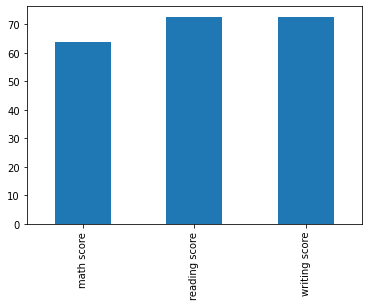

In [77]:
female_score.plot(kind='bar')
plt.show()

female student has a slightly lower math score than reading and writing

In [78]:
# slicing to get male score 
male = performance[performance['gender'] == 'male']

In [79]:
male.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_score
3,male,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,some college,standard,none,76,78,75,76.333333
7,male,some college,free/reduced,none,40,43,39,40.666667
8,male,high school,free/reduced,completed,64,64,67,65.000000
10,male,associate's degree,standard,none,58,54,52,54.666667


In [80]:
male_stat = male.describe()

In [81]:
male_score = male_stat.loc['mean','math score':'writing score']

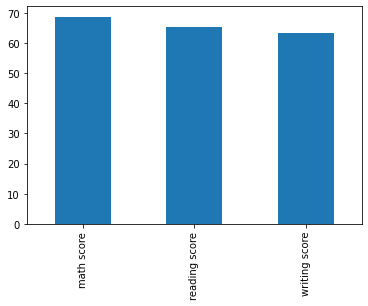

In [83]:
male_score.plot(kind='bar')
plt.show()

In contrast, male has a higher math score than reading and writing

### Question 6: What is the correlation between each score?

In [85]:
# Let see the correlation between math and reading
math_corr = performance['math score']
reading_corr = performance['reading score']

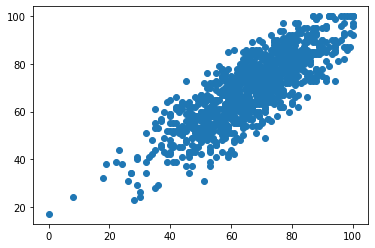

In [86]:
plt.scatter(x=math_corr,y=reading_corr)
plt.show()

In [87]:
# correlation between math and reading 
writing_corr = performance['writing score']

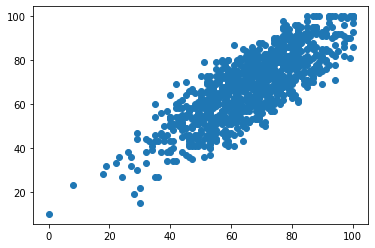

In [89]:
plt.scatter(x=math_corr, y=writing_corr)
plt.show()

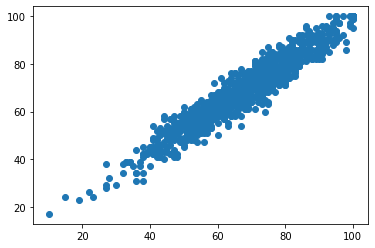

In [90]:
# correlation between writing and reading
plt.scatter(x=writing_corr, y=reading_corr)
plt.show()

Looks like the three variable have a strong correlation to each other. But, writing and reading is the strongest correlation. 